In [1]:
import pandas as pd
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sys.path.insert(0,"..")
bremen_trips = pd.read_csv("../data/processed/trips_weather.csv", index_col=0)
bremen_trips = bremen_trips.sort_values(by=['start_time'], ascending=True)
bremen_trips["start_time"] = pd.to_datetime(bremen_trips["start_time"])

In [3]:

for col in ['start_time']:
    bremen_trips['month'] = pd.DatetimeIndex(bremen_trips['start_time']).month
    bremen_trips['booking_date'] = bremen_trips.start_time.dt.date
    bremen_trips['weekdays'] = pd.DatetimeIndex(bremen_trips['start_time']).weekday

In [4]:
bremen_trips.head()


,bike_type,identification,start_time,end_time,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,...,dew_point_2m,max_at_2m,mean_speed_h/s,direction_degree_x,max_m/s,min_mean_m/s,max_mean_m/s,direction_degree_y,min,mm
0,71,12099440,2019-01-20 00:13:00,2019-01-20 00:23:00,600.0,8.812554,53.076481,8.804828,53.084196,0,...,-4.8,-3.4,2.6,80.0,3.1,2.1,2.6,80.0,0.0,0.0
1,71,10278649,2019-01-20 00:16:00,2019-01-20 04:47:00,16260.0,8.884911,53.078923,8.884911,53.078923,2985,...,-4.8,-3.4,2.6,80.0,3.1,2.1,2.6,80.0,0.0,0.0
2,71,12099749,2019-01-20 00:40:00,2019-01-20 00:44:00,240.0,8.801623,53.067878,8.793217,53.064244,0,...,-4.6,-3.6,2.6,80.0,3.1,2.4,2.6,80.0,0.0,0.0
3,71,12099872,2019-01-20 00:47:00,2019-01-20 00:54:00,420.0,8.814744,53.084841,8.801135,53.094596,0,...,-4.6,-3.6,2.6,80.0,3.1,2.4,2.6,80.0,0.0,0.0
4,71,7873840,2019-01-20 00:55:00,2019-01-20 23:10:00,80100.0,8.845743,53.106418,8.845743,53.106418,2912,...,-4.1,-3.2,2.4,80.0,2.6,2.1,2.6,80.0,0.0,0.0


In [5]:
bremen_trips['duration_min'] = bremen_trips['duration_sec']/60

In [6]:
# drop entries with booking durations longer than 2 days
# bremen_trips = bremen_trips[bremen_trips['duration_min'] < 200]
# bremen_trips = bremen_trips[(bremen_trips['start_place'] != 0) & (bremen_trips['end_place'] != 0)]
# bremen_trips = bremen_trips[bremen_trips['month'] != 1]

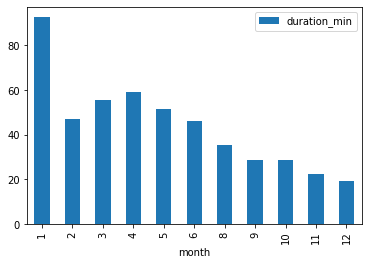

In [7]:
# avg duration per month (looks like we have some outliers)

df = bremen_trips.groupby('month').duration_min.mean().to_frame()
df.plot(kind="bar")

In [8]:
bremen_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143665 entries, 0 to 143664
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   bike_type           143665 non-null  int64         
 1   identification      143665 non-null  int64         
 2   start_time          143665 non-null  datetime64[ns]
 3   end_time            143665 non-null  object        
 4   duration_sec        143665 non-null  float64       
 5   start_lng           143665 non-null  float64       
 6   start_lat           143665 non-null  float64       
 7   end_lng             143665 non-null  float64       
 8   end_lat             143665 non-null  float64       
 9   start_place         143665 non-null  int64         
 10  end_place           143665 non-null  int64         
 11  start_plz           143665 non-null  int64         
 12  end_plz             143665 non-null  int64         
 13  month               143665 no

In [9]:
data_raw = bremen_trips #[['bike','bike_type','identification', 'start_time', 'duration_min', 'start_lng', 'start_lat', 'start_place', 'month', 'weekdays']]

In [10]:
data_raw['hour'] = data_raw['start_time'].dt.hour
data_raw['min'] = data_raw['start_time'].dt.minute
data_raw['day_of_month'] = data_raw['start_time'].dt.day
data_raw.drop(axis = 1, columns = 'start_time', inplace=True)

In [11]:
# get uniformative features meaning that they contain over 95% of the time the same value
num_rows = len(data_raw.index)
low_information_cols = [] #

for col in data_raw.columns:
    cnts = data_raw[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

bike_type: 99.84478%
71    143442
29       223
Name: bike_type, dtype: int64

mm: 95.91271%
0.00    137793
0.03       821
NaN        739
0.04       736
0.06       260
         ...  
1.76         1
1.23         1
1.10         1
0.73         1
1.25         1
Name: mm, Length: 117, dtype: int64



In [15]:
for col in data_raw.columns:
    pct_missing = np.mean(data_raw[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

duration_sec - 0.0%
start_lng - 0.0%
start_lat - 0.0%
start_place - 0.0%
start_plz - 0.0%
month - 0.0%
weekdays - 0.0%
duration_min - 0.0%
temp_2m - 0.0%
humidity_2m - 0.0%
dew_point_2m - 0.0%
max_at_2m - 0.0%
mean_speed_h/s - 0.0%
direction_degree_x - 0.0%
max_m/s - 0.0%
min_mean_m/s - 0.0%
max_mean_m/s - 0.0%
direction_degree_y - 0.0%
min - 0.0%
hour - 0.0%
day_of_month - 0.0%


In [13]:
data_raw.drop(columns=["identification", "bike_type", "mm", "start_name", "end_time", "end_name", "end_lng", "end_lat", "end_place", "end_plz", "booking_date", "timestamp"], inplace=True)

In [16]:
data_raw.dropna(inplace=True)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142926 entries, 0 to 143664
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        142926 non-null  float64
 1   start_lng           142926 non-null  float64
 2   start_lat           142926 non-null  float64
 3   start_place         142926 non-null  int64  
 4   start_plz           142926 non-null  int64  
 5   month               142926 non-null  int64  
 6   weekdays            142926 non-null  int64  
 7   duration_min        142926 non-null  float64
 8   temp_2m             142926 non-null  float64
 9   humidity_2m         142926 non-null  float64
 10  dew_point_2m        142926 non-null  float64
 11  max_at_2m           142926 non-null  float64
 12  mean_speed_h/s      142926 non-null  float64
 13  direction_degree_x  142926 non-null  float64
 14  max_m/s             142926 non-null  float64
 15  min_mean_m/s        142926 non-nul

In [17]:
#data_raw['is_freefloat'] = np.where(data_raw['start_place'] == 0, 1, 0)


In [18]:
#data_raw = data_raw.merge(pd.get_dummies(data_raw['start_plz']), left_index=True,right_index=True)

In [19]:
data_raw.corrwith(data_raw['duration_min'])[:60]

duration_sec          1.000000
start_lng             0.006962
start_lat             0.039297
start_place           0.057302
start_plz             0.048741
month                -0.106360
weekdays              0.011312
duration_min          1.000000
temp_2m               0.017365
humidity_2m          -0.058349
dew_point_2m         -0.026082
max_at_2m             0.017693
mean_speed_h/s        0.021873
direction_degree_x   -0.000834
max_m/s               0.027060
min_mean_m/s          0.008624
max_mean_m/s          0.022586
direction_degree_y   -0.001909
min                  -0.004710
hour                 -0.028797
day_of_month          0.007346
dtype: float64

In [20]:
X = data_raw.drop(columns={'duration_min','duration_sec'})
#X = data_raw[['start_plz','month','start_lng','start_lat','hour']]
y = data_raw['duration_min']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142926 entries, 0 to 143664
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_lng           142926 non-null  float64
 1   start_lat           142926 non-null  float64
 2   start_place         142926 non-null  int64  
 3   start_plz           142926 non-null  int64  
 4   month               142926 non-null  int64  
 5   weekdays            142926 non-null  int64  
 6   temp_2m             142926 non-null  float64
 7   humidity_2m         142926 non-null  float64
 8   dew_point_2m        142926 non-null  float64
 9   max_at_2m           142926 non-null  float64
 10  mean_speed_h/s      142926 non-null  float64
 11  direction_degree_x  142926 non-null  float64
 12  max_m/s             142926 non-null  float64
 13  min_mean_m/s        142926 non-null  float64
 14  max_mean_m/s        142926 non-null  float64
 15  direction_degree_y  142926 non-nul

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.60, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.60, shuffle=False)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)

In [29]:
lin = LinearRegression()

In [30]:
lin.fit(X_train_poly, y_train)
lin.score(X_train_poly, y_train)

0.03328225697490517

In [31]:
X_val_poly = poly.fit_transform(X_val)
lin.score(X_val_poly,y_val)

-0.03630514086815273

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [136]:
parameters = {'max_depth':[2, 3, 4, 5, 7],
              'n_estimators':[1, 10, 25, 50, 100, 256, 512],
              'random_state':[42]}
    
def perform_grid_search(X_data, y_data):
    rf = RandomForestRegressor(criterion='mse')
    
    clf = GridSearchCV(rf, parameters, cv=4, scoring='r2', n_jobs=3)
    
    clf.fit(X_data, y_data)
    
    print(clf.cv_results_['mean_test_score'])
    
    return clf.best_params_['n_estimators'], clf.best_params_['max_depth']

In [137]:
# extract parameters
n_estimator, depth = perform_grid_search(X_train, y_train)
c_random_state = 42
print(n_estimator, depth, c_random_state)

[ 0.00948408  0.01434006  0.01197755  0.01549719  0.01703563  0.01710094
  0.01691182  0.01038098  0.02736511  0.02565955  0.02824473  0.03034348
  0.03091979  0.0300638  -0.02478662  0.02176968  0.01924592  0.02177784
  0.02471591  0.02553426  0.02558391 -0.0747195   0.01529336  0.00885957
  0.01301461  0.01588311  0.01541091  0.0157104  -0.07502949 -0.00744773
 -0.01977203 -0.01238211 -0.00838997 -0.00901166 -0.0069959 ]
256 3 42


In [35]:
rf = RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=512, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=512, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
y_pred = rf.predict(X_train)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
mean_squared_error(y_train, y_pred)

22897.575669627116

In [39]:
mean_absolute_error(y_train, y_pred)

64.9294162033794